# Workshop 4: Modelling and Simulation

## Introduction

A [scientific model ](https://www.britannica.com/science/scientific-modeling) is a mathematical or conceptual representation of a real-world process or phenomenon. 

In the previous workshop, we simulated the motion of an object moving under gravity using a simple quadratic equation. The equation was a model of the motion of the object, but in reality it's only a prediction of the object's movement. 

We can test the model by performing an experiment and comparing the result of the experiment against the prediction of the model. We can think of the model as a 'scientific hypothesis' which we confirm or refute based on the results of the experiment, a key component of the [scientific method](https://www.britannica.com/science/scientific-method). 

In reality we might find that the model is a reasonable appoximation to reality - but by making refinements to the model we can improve its predictive power.

:::{admonition} Coming soon
:class: hint
Later you will work in groups of 3 - 4 students to perform a real experiment which tests a model of the motion of an object under gravity.
:::

## Exponential Growth
Bacteria grown in the lab provide an example of **exponential growth**. In exponential growth, the growth rate of the population is in proportion to the size of the population. Bacteria reproduce by binary fission, and the time between divisions is about an hour.

Suppose we place a 1000 bacteria in a flask with an unlimited supply of nutrients. After one hour, each bacterium will divide, yielding 2000 bacteria (an increase of 1000). After 2 hours, each of the 2000 bacteria will divide, producing 4000 (an increase of 2000 bacteria). After 3 hours, each of the 4000 bacteria will divide, producing 8000 (an increase of 4000 bacteria). 

The key concept of exponential growth is that the number of cells added in each generation is in direct proportion to the number cells.

## Modelling Exponential Growth

Suppose a population of bacteria belonging to species X doubles in size every hour. Then we can model the population using the following equation:

$$x_{i+1} = x_i + rx_i $$

where $x_i$ is the population at hour $i$ and $r$ is the growth rate. For this scenario, where the population doubles with each step, we set $r=1$. The equation represents the fact that the population at hour $i+1$ is $r+1$ times the population at hour $i$.

Suppose that the initial population is exactly $1000$ cells and we would like to simulate the population size over the course of 8 hours.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

r_X = 1
n_hours = 8
initial_population = 1000
pop_X = np.zeros(n_hours + 1)

pop_X[0] = initial_population
for i in range(n_hours):
    pop_X[i + 1] = pop_X[i] + pop_X[i] * r_X
    
print("Population of species X:", pop_X)

Population of species X: [  1000.   2000.   4000.   8000.  16000.  32000.  64000. 128000. 256000.]


:::{note}
Python uses *exponential notation* to express decimal numbers e.g. $2048 = 2.048 \times 10^3$ is expressed as `2.048e+03`.
:::

Using `plt.plot` we can visualise the population curve over the 8 hours:

Text(0.5, 1.0, 'Species X')

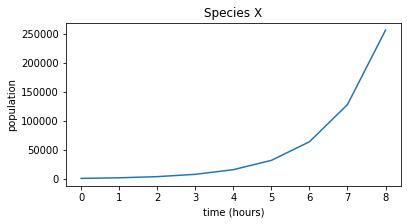

In [2]:
plt.figure(figsize=(6,3))
plt.plot(pop_X)

plt.xlabel("time (hours)")
plt.ylabel("population")
plt.title("Species X")

Now suppose we have another bacterial species Y with a slower growth rate $r = 0.1$.

|Species|r|
|---|---|
|X|1.0|
|Y|0.1|

> Use the code above to simulate the growth of population Y.

> Plot the predicted population of species Y on a separate figure.

## Experimental Data

Now suppose that we perform a laboratory experiment in order to measure the growth in the two species of bacteria. The population of each was recorded every hour.

:::{seealso}
See [here](https://courses.lumenlearning.com/boundless-microbiology/chapter/counting-bacteria/) for how you might measure a bacterial population in practice.
:::

|Time (hours)|0|1|2|3|4|5|6|7|8|
|---|---|---|---|---|---|---|---|---|---|
|Species X population (thousands)|1.0|2.18|4.45|8.91|16.1|31.49|60.89|117.58|214.4|
|Species Y population (thousands)|1.0|1.47|2.02|2.81|4.16|5.88|7.98|10.99|15.59|

Let's plot this experimental data on the same graph as the model simulation.

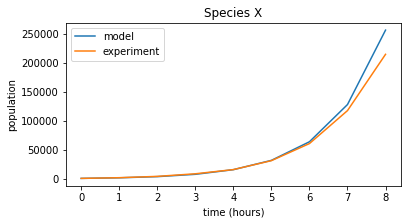

In [3]:
data_X = np.array([  1.  ,   2.18,   4.45,   8.91,  16.1 ,  31.49,  60.89, 117.58, 214.4 ]) * 1000

plt.figure(figsize=(6,3))
plt.plot(pop_X, label="model")
plt.plot(data_X, label="experiment")

plt.xlabel("time (hours)")
plt.ylabel("population")
plt.title("Species X")
plt.legend()

Notice that the the experimental data is a good fit to the model prediction, so at this point we can be confident in our model, and our value of $r=1$.

> On a new figure, plot the experimental data and model prediction for species Y.

You should find that the model and experiment aren't such a good fit for species Y.

> By changing the value of `r_Y` until the two graphs coincide, determine a good value of $r$ for species Y.

The experimenter continues the experiment for a full 24 hours. The results of the experiment are in the files `data_exp_X.txt` and `data_exp_Y.txt`.

<a href="../workshop_4/data_exp_X" download>data_exp_X.txt</a>  
<a href="../workshop_4/data_exp_Y" download>data_exp_Y.txt</a>

We can use the `numpy` function `np.loadtxt` to load the data into a numpy array:

In [4]:
data_X = np.loadtxt("data_exp_X.txt")
print(data_X)

[1.00000000e+03 2.17777342e+03 4.44576258e+03 8.91456547e+03
 1.60958432e+04 3.14897238e+04 6.08883077e+04 1.17580768e+05
 2.14397399e+05 3.81989811e+05 6.03315856e+05 7.87285829e+05
 9.96982461e+05 1.04405640e+06 1.08337178e+06 9.95533440e+05
 9.79746583e+05 9.72332987e+05 9.21969859e+05 1.04273060e+06
 9.43221236e+05 9.37714865e+05 9.85877957e+05 1.07409317e+06]


We'll change the value of `n_hours` to `24` and re-run the model.

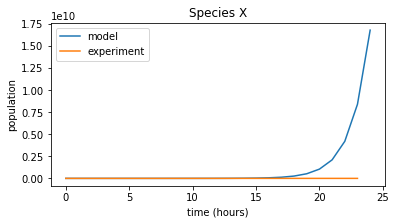

In [5]:
r_X = 1
n_hours = 24
initial_population = 1000
pop_X = np.zeros(n_hours + 1)

pop_X[0] = initial_population
for i in range(n_hours):
    pop_X[i + 1] = pop_X[i] + pop_X[i] * r_X
    
plt.figure(figsize=(6,3))
plt.plot(pop_X, label="model")
plt.plot(data_X, label="experiment")

plt.xlabel("time (hours)")
plt.ylabel("population")
plt.title("Species X")
plt.legend()

The model and experimental data are no longer a good fit at all. At this scale, it looks like the experimental data is zero for the entire 24 hours. However, to see what's going on let's plot the experimental data alone:

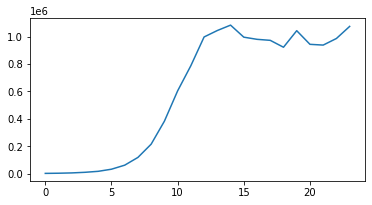

In [6]:
plt.figure(figsize=(6,3))
plt.plot(data_X)

Notice that while the population increases exponentially at first, eventually it stops increasing, likely due to exhausting resources such as nutrients or physical space. Our simple exponential model is insufficient to take this into account.

Instead, we can consider a more sophisticated model, *logistic growth*.

## Logistic Growth

The logistic equation describes the growth of a population where the growth rate is limited by resources.
$$x_{i+1} = x_i + r(1-x_i/K)x_i $$

the growth rate $r$ has been replaced by the term $r(1-x_i/K)$. For small populations (when $x_i$ is much less than $K$) the growth rate is close to $r$. As the population size approaches the value $K$, the growth rate reduces to zero.

:::{note}
$K$ is called the **carrying capacity**.
:::

> Simulate the growth of species X use the new equation. You will need to create a new variable `K_X` and change the line `pop[i + 1] = pop[i] + pop[i] * 2`. Use the value `K_X = 1e6`.
> Plot the experimental and model prediction on the same graph.

You should find that the two curves fit well, showing that our new model predicts the population growth well.

> Repeat the simulation for species Y (Don't forget to load the 24h experimental data for Y, from the text file provided above!). Determine values of $r$ and $K$ that best fit the experimental data. Hint: the value of $r$ affects the steepness of growth, while $K$ is related to the point of saturation.

## Exercise

The following three text files contain the results of 3 bacterial population growth experiments. For each one, plot the data and by running a simulation for each, estimate the value of $r$ and $K$.

<a href="../workshop_4/data_exp_A" download>data_exp_A.txt</a>  
<a href="../workshop_4/data_exp_B" download>data_exp_B.txt</a>  
<a href="../workshop_4/data_exp_B" download>data_exp_C.txt</a>

Which data file corresponds to which of the three species in the table below?

|Species|r|
|---|---|
|1|0.4|
|2|0.7|
|3|0.9|